In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
cdata=pd.read_csv('./TensorFlow_DeepLearning 19hrs/Data/cancer_classification.csv')
cdata.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
cdata.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
benign_0__mal_1            0
dtype: int64

<Axes: xlabel='benign_0__mal_1', ylabel='count'>

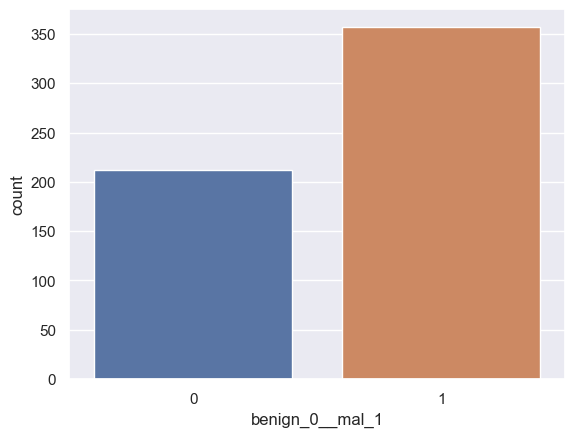

In [9]:
sns.set_theme()
sns.countplot(cdata,x='benign_0__mal_1')

<Axes: >

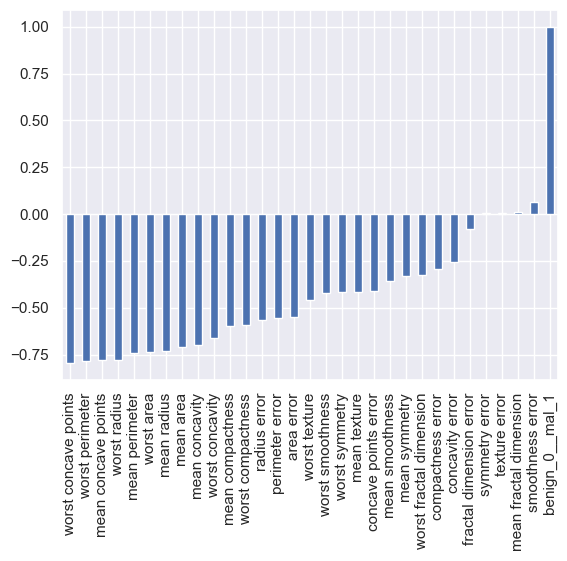

In [17]:
cdata.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

<Axes: >

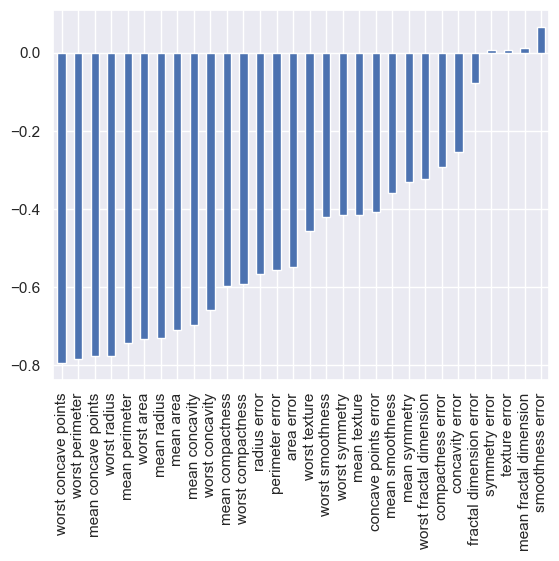

In [18]:
cdata.corr()['benign_0__mal_1'].sort_values()[:-1].plot(kind='bar')

In [20]:
cdata['benign_0__mal_1'].value_counts() # we will predict this value so call it as label

1    357
0    212
Name: benign_0__mal_1, dtype: int64

In [21]:
X=cdata.drop('benign_0__mal_1',axis=1).values
y=cdata['benign_0__mal_1'].values

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [24]:
# we will do preprocessing in our data so that you have to import MinMaxScalar
from sklearn.preprocessing import MinMaxScaler

scalar=MinMaxScaler() # creating the instance

In [25]:
# data leakage purpose thats why we are doing the fit_transform in train data

X_train=scalar.fit_transform(X_train)

X_test=scalar.transform(X_test) # in test data there is no possiblity to data leakage so no worry

In [26]:
# First we need to split our data 
# then we need preprocess the data like scaling our data  fit and transform our training data
# then we need to create the model like Sequential and dense from these operation we should import some lib


In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [30]:
X_train.shape  # 426 rowa and 30 features which means columns

(426, 30)

In [31]:
model=Sequential()

model.add(Dense(30,activation='relu')) # 30 neuron
model.add(Dense(15,activation='relu')) # 15 neuron

# whenever the binary classification occur we need to use activation function as sigmoid
model.add(Dense(1,activation='sigmoid')) # 1neuron

model.compile(loss='binary_crossentropy',optimizer='adam')

In [32]:
# above we created the model now we will train our model
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test))

Epoch 1/600
14/14 [==============================] - 1s 28ms/step - loss: 0.6896 - val_loss: 0.6742
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6609 - val_loss: 0.6428
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6290 - val_loss: 0.6071
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5919 - val_loss: 0.5631
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5457 - val_loss: 0.5110
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4912 - val_loss: 0.4553
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4363 - val_loss: 0.4002
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3873 - val_loss: 0.3530
Epoch 9/600
14/14 [==============================] - 0s 7ms/step - loss: 0.3432 - val_loss: 0.3093
Epoch 10/600
14/14 [==============================] - 0s 10ms/step - loss: 0.3040 - val_loss: 0.2749
Epoch 1

Epoch 83/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0527 - val_loss: 0.1157
Epoch 84/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0509 - val_loss: 0.1190
Epoch 85/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0515 - val_loss: 0.1148
Epoch 86/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0506 - val_loss: 0.1191
Epoch 87/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0539 - val_loss: 0.1113
Epoch 88/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0559 - val_loss: 0.1294
Epoch 89/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0527 - val_loss: 0.1143
Epoch 90/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0548 - val_loss: 0.1277
Epoch 91/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0497 - val_loss: 0.1217
Epoch 92/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0495 - val_loss: 0.1199


14/14 [==============================] - 0s 7ms/step - loss: 0.0378 - val_loss: 0.1282
Epoch 165/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0390 - val_loss: 0.1278
Epoch 166/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0405 - val_loss: 0.1286
Epoch 167/600
14/14 [==============================] - 0s 11ms/step - loss: 0.0448 - val_loss: 0.1314
Epoch 168/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0379 - val_loss: 0.1295
Epoch 169/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0390 - val_loss: 0.1279
Epoch 170/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0382 - val_loss: 0.1326
Epoch 171/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0368 - val_loss: 0.1247
Epoch 172/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0386 - val_loss: 0.1486
Epoch 173/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0389 - val_loss: 0.1215
Epo

14/14 [==============================] - 0s 7ms/step - loss: 0.0304 - val_loss: 0.1487
Epoch 246/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0313 - val_loss: 0.1337
Epoch 247/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0326 - val_loss: 0.1429
Epoch 248/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0293 - val_loss: 0.1379
Epoch 249/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0289 - val_loss: 0.1360
Epoch 250/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0283 - val_loss: 0.1412
Epoch 251/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0299 - val_loss: 0.1412
Epoch 252/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0285 - val_loss: 0.1461
Epoch 253/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0352 - val_loss: 0.1347
Epoch 254/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0354 - val_loss: 0.1585
Epoc

14/14 [==============================] - 0s 5ms/step - loss: 0.0223 - val_loss: 0.1475
Epoch 327/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0255 - val_loss: 0.1551
Epoch 328/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0218 - val_loss: 0.1427
Epoch 329/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0227 - val_loss: 0.1543
Epoch 330/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0251 - val_loss: 0.1508
Epoch 331/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0257 - val_loss: 0.1411
Epoch 332/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0251 - val_loss: 0.1734
Epoch 333/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0239 - val_loss: 0.1461
Epoch 334/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0207 - val_loss: 0.1661
Epoch 335/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0229 - val_loss: 0.1529
Epoc

14/14 [==============================] - 0s 5ms/step - loss: 0.0170 - val_loss: 0.1716
Epoch 408/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0200 - val_loss: 0.1489
Epoch 409/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0186 - val_loss: 0.2352
Epoch 410/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0200 - val_loss: 0.1551
Epoch 411/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0161 - val_loss: 0.1742
Epoch 412/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0167 - val_loss: 0.1576
Epoch 413/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0165 - val_loss: 0.1843
Epoch 414/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0200 - val_loss: 0.1456
Epoch 415/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0164 - val_loss: 0.1874
Epoch 416/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0220 - val_loss: 0.1539
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0130 - val_loss: 0.1876
Epoch 489/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0109 - val_loss: 0.1799
Epoch 490/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0121 - val_loss: 0.2030
Epoch 491/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0116 - val_loss: 0.1874
Epoch 492/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0101 - val_loss: 0.1836
Epoch 493/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0111 - val_loss: 0.1837
Epoch 494/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0111 - val_loss: 0.2072
Epoch 495/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0141 - val_loss: 0.1643
Epoch 496/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0115 - val_loss: 0.2096
Epoch 497/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0108 - val_loss: 0.1855
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0078 - val_loss: 0.1944
Epoch 570/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0086 - val_loss: 0.2298
Epoch 571/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0077 - val_loss: 0.2191
Epoch 572/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0071 - val_loss: 0.2021
Epoch 573/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0069 - val_loss: 0.2205
Epoch 574/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0073 - val_loss: 0.2018
Epoch 575/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0071 - val_loss: 0.2240
Epoch 576/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0068 - val_loss: 0.2104
Epoch 577/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0071 - val_loss: 0.2280
Epoch 578/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0071 - val_loss: 0.1960
Epoc

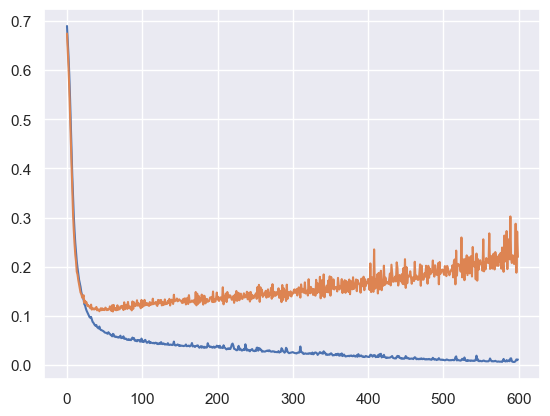

In [36]:
plt.plot(pd.DataFrame(model.history.history))

<Axes: >

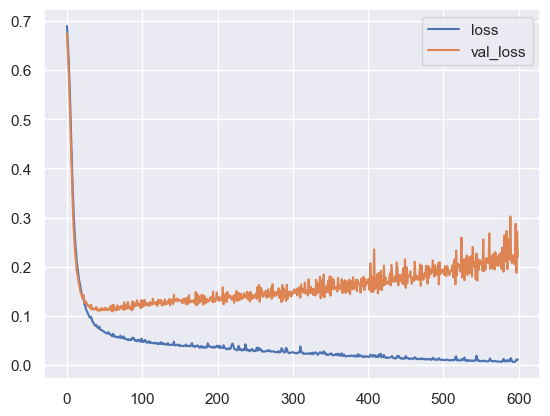

In [37]:
candata_train=pd.DataFrame(model.history.history)
candata_train.plot() # overfitting means to many validation loss during training

In [38]:
# above we can see over loss so thats why we have another option that its early stopping 

# so which is use to stop early before over loss (overfitting)

#stop the val loss stop the training

In [39]:
# again create a new model to import callbacks

from tensorflow.keras.callbacks import EarlyStopping

In [40]:
# when you want to knoe the full details of earlystooping you jsut type help(EarlyStopping)

In [42]:
model=Sequential()

model.add(Dense(30,activation='relu')) # 30 neuron
model.add(Dense(15,activation='relu')) # 15 neuron

# whenever the binary classification occur we need to use activation function as sigmoid
model.add(Dense(1,activation='sigmoid')) # 1neuron

model.compile(loss='binary_crossentropy',optimizer='adam')

In [43]:
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25) 
# here arg is check the val_loss if it high then stop traing our model

In [44]:
# Again  train our model see what will happen

model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),
         callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 13ms/step - loss: 0.6517 - val_loss: 0.6226
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5986 - val_loss: 0.5714
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5526 - val_loss: 0.5236
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5072 - val_loss: 0.4784
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4636 - val_loss: 0.4344
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4239 - val_loss: 0.3960
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3864 - val_loss: 0.3573
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3511 - val_loss: 0.3233
Epoch 9/600
14/14 [==============================] - 0s 9ms/step - loss: 0.3194 - val_loss: 0.2903
Epoch 10/600
14/14 [==============================] - 0s 9ms/step - loss: 0.2899 - val_loss: 0.2636
Epoch 11

<Axes: >

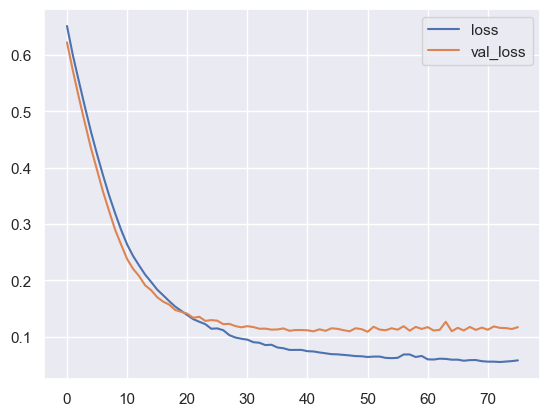

In [45]:
model_plot=pd.DataFrame(model.history.history)
model_plot.plot() # this is what we want to see its beginning stage trainig hasbeen stopped

In [46]:
from tensorflow.keras.layers import Dropout

In [48]:
#another option also available for overfitting which is called as dropout
# its turnoff the neuron randomly when over fitting occurs


model=Sequential()

model.add(Dense(30,activation='relu')) # 30 neuron
model.add(Dropout(0.5)) # 0 means it will stop neurons

model.add(Dense(15,activation='relu')) # 15 neuron
model.add(Dropout(0.5))

# whenever the binary classification occur we need to use activation function as sigmoid
model.add(Dense(1,activation='sigmoid')) # 1neuron

model.compile(loss='binary_crossentropy',optimizer='adam')

In [49]:

model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),
         callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 11ms/step - loss: 0.6933 - val_loss: 0.6648
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6751 - val_loss: 0.6399
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6594 - val_loss: 0.6186
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6460 - val_loss: 0.5954
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6078 - val_loss: 0.5663
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5973 - val_loss: 0.5370
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5820 - val_loss: 0.5090
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5470 - val_loss: 0.4755
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5170 - val_loss: 0.4469
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4906 - val_loss: 0.4123
Epoch 11

14/14 [==============================] - 0s 4ms/step - loss: 0.1260 - val_loss: 0.0954
Epoch 84/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1095 - val_loss: 0.0975
Epoch 85/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1170 - val_loss: 0.0953
Epoch 86/600
14/14 [==============================] - 0s 7ms/step - loss: 0.1073 - val_loss: 0.0981
Epoch 87/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1373 - val_loss: 0.0993
Epoch 88/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1038 - val_loss: 0.0960
Epoch 89/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1277 - val_loss: 0.1036
Epoch 90/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1147 - val_loss: 0.0972
Epoch 91/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1045 - val_loss: 0.1091
Epoch 92/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1180 - val_loss: 0.0946
Epoch 93/600


<Axes: >

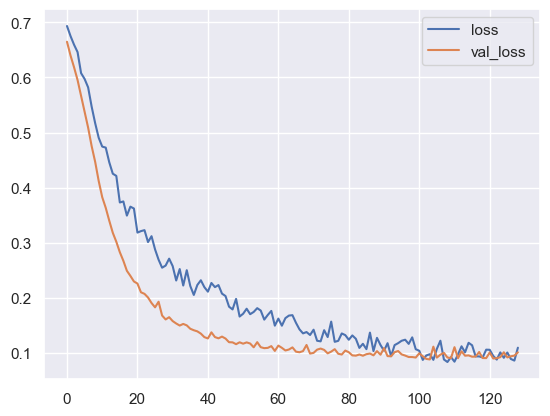

In [51]:
# above is one of the method to stop overfitting during training time

model_loss=pd.DataFrame(model.history.history)
model_loss.plot() # its almose improve

In [66]:
# we will perform the classification tas
predictions = model.predict(X_test)
predictions = np.round(y_pred).astype(int)
predictions
#predictions = np.argmax(model.predict(X_test), axis=-1)

5/5 [==============================] - 0s 2ms/step


array([[1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
    

In [67]:
from sklearn.metrics import classification_report,confusion_matrix

In [68]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 3 85]]


In [69]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.99      0.97      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [ ]:
# Yeah its working . error thorws above when i trying to predtict the value by using my test data
# This TF doesnt support predict_class fucntion
# I have used predict to predict the values then using numpy to roundedup my value and converts the value to integer